In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import ares
from average_dTb import average_dTb

In [2]:
sim = ares.simulations.Global21cm()
sim.run()

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

############################################################################
##                       ARES Simulation: Overview                        ##
############################################################################
## ---------------------------------------------------------------------- ##
## Source Populations                                                     ##
## ---------------------------------------------------------------------- ##
##           sfrd    sed  radio  O/IR  Lya    LW   LyC   Xray  RTE        ##
## pop #0 :  fcoll    yes    -     -     x     x     -     -     -        ##
## pop #1 : sfrd->0   yes    -     -     -     -     -     x     -        ##
## pop #2 : sfrd->0   yes    -     -     -     -     x     -     -        ##
## ---------------------------------------------------------------------- ##
## Physics                                                                ##
## -----

In [3]:
def dTb(theta, z):
    m_chi = theta[0]
    z_array, dTb_averaged, m_chi = average_dTb(m_chi=m_chi, more_random_v_stream=2)
    dTb = np.interp(z, z_array, dTb_averaged)
    return dTb

In [4]:
z_sample = np.arange(10, 300, 5)

theta_true = [0.5]
dTb_accurate = dTb(theta_true, z_sample)

noise = 1
dTb_sample = dTb_accurate + noise * np.random.normal(size = z_sample.shape[0])

dark_matter_mass = 0.5 GeV
initial_v_stream = 20087.043797789695 m/s
initial_v_stream = 29196.26462818788 m/s
It costs 21.85 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 94 files of dTb for m_chi = 0.5 GeV...
94 files have been interpolated.


(-60.0, 0.0)

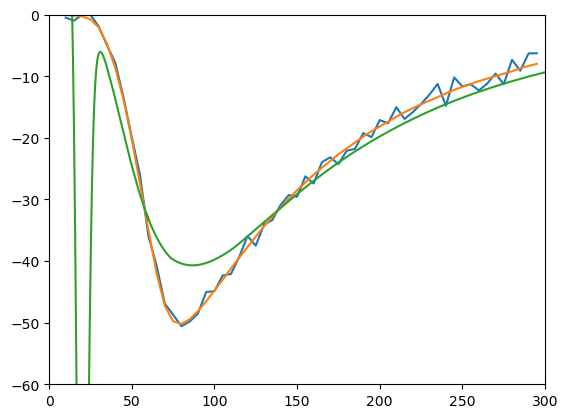

In [5]:
plt.plot(z_sample, dTb_sample)
plt.plot(z_sample, dTb_accurate)
plt.plot(sim.history['z'], sim.history['dTb'])
plt.xlim(0,300)
plt.ylim(-60,0)

In [6]:
def fun(theta):
    residual = dTb(theta, z_sample) - dTb_sample
    return residual

In [7]:
theta_guess = [3]
res = least_squares(fun, theta_guess, diff_step=0.1)

dark_matter_mass = 3.0 GeV
initial_v_stream = 21043.886913443606 m/s
initial_v_stream = 23469.247670359266 m/s
It costs 20.37 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 86 files of dTb for m_chi = 3.0 GeV...
86 files have been interpolated.
dark_matter_mass = 3.3 GeV
initial_v_stream = 19439.228548262734 m/s
initial_v_stream = 32636.51672774257 m/s
It costs 20.45 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 4 files of dTb for m_chi = 3.3 GeV...
4 files have been interpolated.
dark_matter_mass = 0.9753982441126205 GeV
initial_v_stream = 39849.633964228204 m/s
initial_v_stream = 34394.65348338806 m/s
It costs 20.74 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 4 files of dTb for m_chi = 0.9753982441126205 GeV...
4 files have been interpolated.
dark_matter_mass = 2.493849561028155 GeV
initial_v_stream = 19344.945315281966 m/s

/home/xia/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,



initial_v_stream = 37721.29905763143 m/s
It costs 21.73 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 2 files of dTb for m_chi = 2.493849561028155 GeV...
2 files have been interpolated.
dark_matter_mass = 2.8734623902570386 GeV
initial_v_stream = 42608.2359202961 m/s
initial_v_stream = 33544.860614795856 m/s
It costs 20.26 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 2 files of dTb for m_chi = 2.8734623902570386 GeV...
2 files have been interpolated.
dark_matter_mass = 2.9683655975642598 GeV
initial_v_stream = 20418.254473891364 m/s
initial_v_stream = 31914.927794189673 m/s
It costs 20.48 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 2 files of dTb for m_chi = 2.9683655975642598 GeV...
2 files have been interpolated.
dark_matter_mass = 2.992091399391065 GeV
initial_v_stream = 13943.039464372729 m/s
initial_v_stream = 17121.908274972604 m/s
It costs 20.32 seconds to calculate dTb of 2 different initial_v_

In [ ]:
res.success

True

In [ ]:
res.x

array([1.04845525])

In [10]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb_accurate, label = 'true')
plt.plot(z_sample, dTb(res.x, z_sample), label = 'fit')
plt.plot(sim.history['z'], sim.history['dTb'], label = 'default')
plt.xlim(0,300)
plt.ylim(-60,0)
plt.legend()

dark_matter_mass = 1.0484552463902492 GeV
initial_v_stream = 24928.569704755537 m/s
initial_v_stream = 28339.836755434604 m/s

In [6]:
from numpy.linalg import norm

def distance(theta):
    residual = dTb(theta, z_sample) - dTb_sample
    distance = norm(residual)
    return distance

In [20]:
mass_distance = np.array([0.1, distance([0.1])])
mass_distance = np.vstack((mass_distance, np.array([1, distance([1])])))
mass = (mass_distance[-1][0] + mass_distance[-2][0]) / 2
mass_distance = np.vstack((mass_distance, np.array([mass, distance([mass])])))
print(mass_distance)

dark_matter_mass = 0.1 GeV
initial_v_stream = 19166.237008923887 m/s
initial_v_stream = 1974.0210253762016 m/s
It costs 27.39 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 172 files of dTb for m_chi = 0.1 GeV...
172 files have been interpolated.
dark_matter_mass = 1 GeV
initial_v_stream = 37246.098659738534 m/s
initial_v_stream = 22174.91400025566 m/s
It costs 21.82 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 158 files of dTb for m_chi = 1 GeV...
158 files have been interpolated.
dark_matter_mass = 0.55 GeV
initial_v_stream = 20533.080752840204 m/s
initial_v_stream = 36888.400088407325 m/s
It costs 51.62 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 12 files of dTb for m_chi = 0.55 GeV...
12 files have been interpolated.
[[ 0.1        85.42542169]
 [ 1.         35.85512321]
 [ 0.55       23.65307503]]


In [25]:
if mass_distance[-1][1] > np.max((mass_distance[-2][1], mass_distance[-3][1])):
    print("something wrong.")
elif mass_distance[-2][1] < mass_distance[-3][1]:
    mass = (mass_distance[-2][0]+mass_distance[-1][0])/2
elif mass_distance[-2][1] > mass_distance[-3][1]:
    mass = (mass_distance[-3][0]+mass_distance[-1][0])/2

mass_distance = np.vstack((mass_distance, np.array([mass, distance([mass])])))
print(mass_distance)

something wrong.
dark_matter_mass = 0.775 GeV
initial_v_stream = 39466.86311287316 m/s
initial_v_stream = 22319.2822678172 m/s
It costs 22.29 seconds to calculate dTb of 2 different initial_v_streams.
Preprocessing 4 files of dTb for m_chi = 0.775 GeV...
4 files have been interpolated.
[[ 0.1        85.42542169]
 [ 1.         35.85512321]
 [ 0.55       23.65307503]
 [ 0.775      63.05301491]
 [ 0.775      58.02136485]]
